In [1]:
import pandas as pd
import matplotlib
import numpy as np
import numpy.linalg as LA
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from sklearn.manifold import TSNE
import Utils.BuildMatrix as bm
import Utils.TaggedRowVecs as trv
import Utils.TrvPlot as trvPlt
np.core.arrayprint._line_width = 160
%matplotlib inline

In [2]:
RS = 12345
def TSNEtrv(tvs:trv.TaggedRowVecs):
    proj = TSNE(n_components=2, random_state=RS).fit_transform(tvs.row_vecs)
    return trv.TaggedRowVecs(row_vecs=proj, tags=tvs.tags)

In [3]:
def PlotTSNE(tvs:trv.TaggedRowVecs):
        res = TSNEtrv(tvs)
        trvPlt.PlotTrvs(res)
        plt.show()
        return res

#### TSNE with simple gaussians

In [4]:
dimA = 100
stdDev = 0.001
numPoints = 150

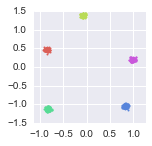

In [5]:
q = trv.Gaussians(dim=dimA, num_points=5)
tcvG = trv.Gaussians(centers=q,
                     num_points=numPoints,
                     covMatrix=np.matrix(np.diag([stdDev] * dimA)))
out = trvPlt.PlotTrvs(tcvG,
                figsize=(2,2), 
                markersize=2, 
                tag_extractor=lambda x: x[0])

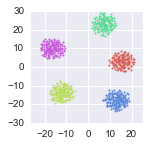

In [6]:
resG = TSNEtrv(tcvG)
out = trvPlt.PlotTrvs(resG,
                figsize=(2,2), 
                markersize=2, 
                tag_extractor=lambda x: x[0])

#### Gaussian - Gaussian/core

In [7]:
dimB = 100
numClustersB1 = 15
stdDevB1 = 10.0
stdDevB2a = 1.0
stdDevB2b = 0.1
numPointsB2a = 320
numPointsB2b = 80

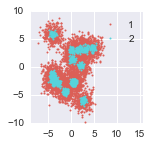

In [8]:
q = trv.Gaussians(
    centers=trv.Single(vec=np.array([0] * dimB), tag='.'),
    covMatrix=np.matrix(np.diag([stdDevB1] * dimB)),
    num_points=numClustersB1)
tcvGg = trv.GaussianTwins(
    centers=q,
    covMatrix1=np.matrix(np.diag([stdDevB2a] * dimB)),
    covMatrix2=np.matrix(np.diag([stdDevB2b] * dimB)),
    num_points1=numPointsB2a, 
    num_points2=numPointsB2b)
resGg = trvPlt.PlotTrvs(
                tcvGg, 
                figsize=(2,2), 
                markersize=2,
                proj_matrix=bm.randOrthoNormalMatrix(dimB),
                tag_extractor=lambda x: x[0],
                showLegend=True)

In [ ]:
resG = TSNEtrv(tcvGg)
out = trvPlt.PlotTrvs(resG,
                figsize=(10,10), 
                markersize=2, 
                tag_extractor=lambda x: x[0])

In [ ]:
resG4g = trvPlt.PlotTrvs(
                resG, 
                figsize=(10,10), 
                markersize=2,
                tag_extractor=lambda x: x[1][0])

#### Gaussian - Gaussian - Gaussain/core

In [ ]:
dimC = 100
numClustersC1 = 4
stdDevC1 = 100000.0
numClustersC2 = 4
stdDevC2 = 0.01

stdDevC3a = 0.025
stdDevC3b = 0.0125
numPoints3a = 400
numPoints3b = 200

In [ ]:
tcvC1 = trv.Gaussians(
            centers=trv.Single(vec=np.array([0] * dimC), tag='.'),
            covMatrix=np.matrix(np.diag([stdDevC1] * dimC)),
            num_points=numClustersC1)

tcvC2 = trv.Gaussians(
            centers=tcvC1,
            covMatrix=np.matrix(np.diag([stdDevC2] * dimC)),
            num_points=numClustersC2)


tcvC3 = trv.GaussianTwins(
    centers=tcvC2,
    covMatrix1=np.matrix(np.diag([stdDevC3a] * dimC)),
    covMatrix2=np.matrix(np.diag([stdDevC3b] * dimC)),
    num_points1=numPoints3a, 
    num_points2=numPoints3b)

resGg = trvPlt.PlotTrvs(
                tcvC3, 
                figsize=(10,10), 
                markersize=2,
                proj_matrix=bm.randOrthoNormalMatrix(dimC),
                tag_extractor=lambda x: x[1][0][1],
                showLegend=True)

In [ ]:
resC = TSNEtrv(tcvC3)
out = trvPlt.PlotTrvs(resC,
                figsize=(10,10), 
                markersize=2, 
                tag_extractor=lambda x: x[1][0][0])

In [ ]:
out = trvPlt.PlotTrvs(resC,
                figsize=(10,10), 
                markersize=2, 
                tag_extractor=lambda x: x[0])

In [ ]:
tcvC3.row_vecs.shape

In [ ]:
covMatrix=np.matrix(np.diag([1.] * 100))

In [ ]:
ss = tcvC3.row_vecs[:20, :]
np.vstack(np.random.multivariate_normal(rv, 
                                        covMatrix,
                                        5) for rv in ss)